# Assignment 18 - Forecasting (Airline Data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Airlines+Data.xlsx')
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
df.shape

(96, 2)

In [4]:
df.columns

Index(['Month', 'Passengers'], dtype='object')

In [5]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
df.duplicated().any()

False

In [7]:
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [9]:
df.describe(include='all')

,Month,Passengers
count,96,96.000000
unique,96,NaN
top,1995-01-01 00:00:00,NaN
freq,1,NaN
first,1995-01-01 00:00:00,NaN
last,2002-12-01 00:00:00,NaN
mean,NaN,213.708333
std,NaN,71.918216
min,NaN,104.000000
25%,NaN,156.000000


In [10]:
df.set_index('Month')

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [11]:
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [12]:
DF = df.copy()

In [13]:
DF

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


### Visualisation

<Axes: ylabel='Density'>

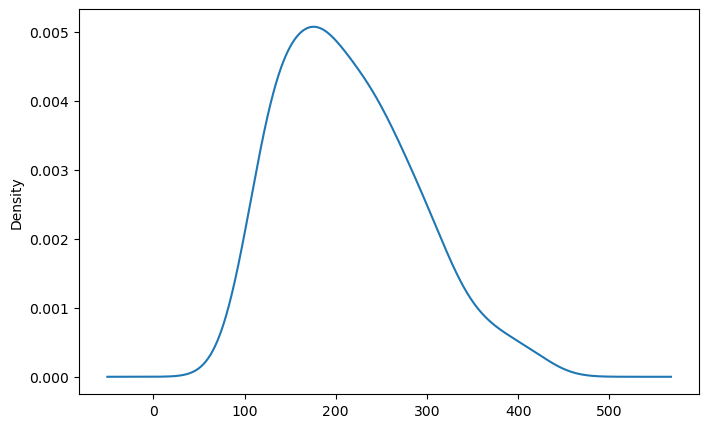

In [14]:
df['Passengers'].plot(kind='kde', figsize=(8,5))

<Axes: >

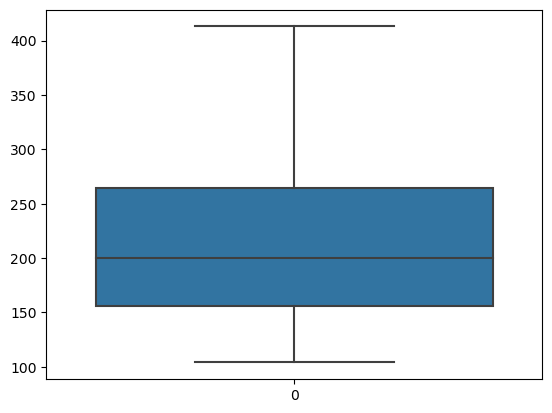

In [15]:
snb.boxplot(df['Passengers'])

##### Checking Correlation with Plots 'tsa_plots'

In [16]:
import statsmodels.graphics.tsaplots as tsa_plots

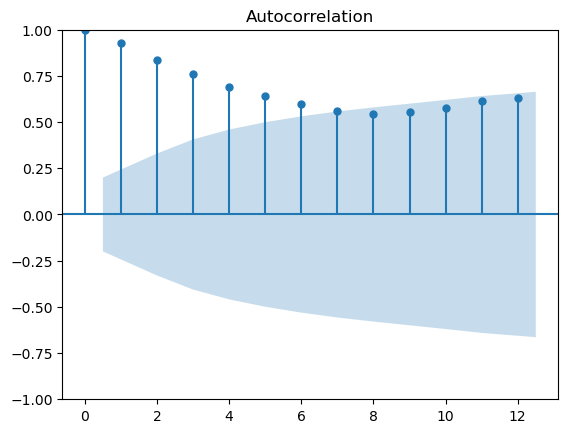

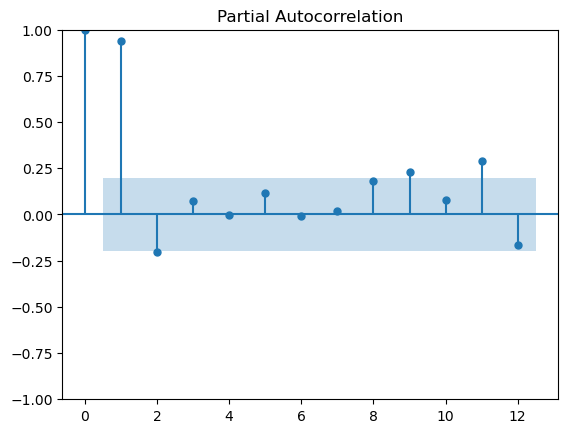

In [17]:
tsa_plots.plot_acf(df['Passengers'], lags=12)
tsa_plots.plot_pacf(df['Passengers'], lags=12)
plt.show()

### Moving Average

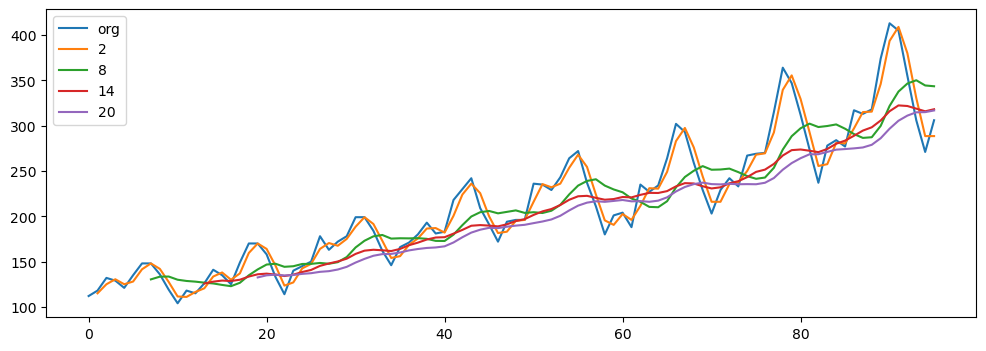

In [18]:
plt.figure(figsize=(12,4))
df.Passengers.plot(label="org")
for i in range(2,24,6):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### Time Series Decomposition Plot

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

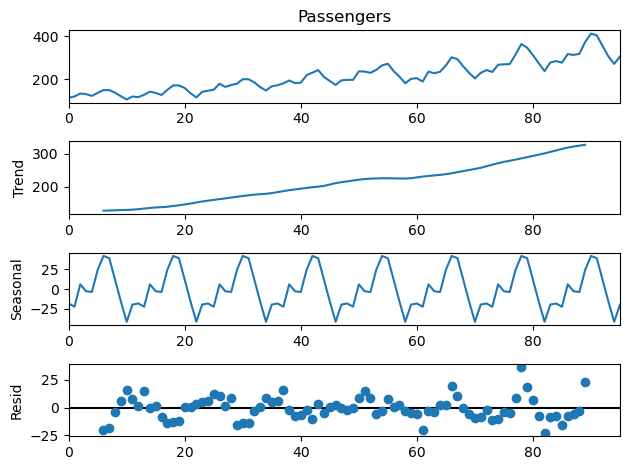

In [20]:
decompose_ts_add = seasonal_decompose(df['Passengers'], period=12)
decompose_ts_add.plot()
plt.show()

##### Defining RMSE

In [21]:
def RMSE(org, pred):
    rmse = np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [22]:
df['Passengers'].value_counts

<bound method IndexOpsMixin.value_counts of 0     112
1     118
2     132
3     129
4     121
     ... 
91    405
92    355
93    306
94    271
95    306
Name: Passengers, Length: 96, dtype: int64>

##### As the Data is not Large Randomly Splitting the Data into Train & Test Manually

In [23]:
train_data = df.head(82)
train_data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
77,2001-06-01,315
78,2001-07-01,364
79,2001-08-01,347
80,2001-09-01,312


In [24]:
test_data = df.tail(14)
test_data

,Month,Passengers
82,2001-11-01,237
83,2001-12-01,278
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374
90,2002-07-01,413
91,2002-08-01,405


### Simple Exponential Method

In [25]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [26]:
ses_model = SimpleExpSmoothing(train_data["Passengers"]).fit()

In [27]:
ses_pred = ses_model.predict(start = test_data.index[0], end = test_data.index[-1])

In [28]:
rmse_ses_model = RMSE(test_data['Passengers'], ses_pred)
rmse_ses_model

66.4938231825882

### Holt Winter Exponential Smoothing Method

In [29]:
from statsmodels.tsa.holtwinters import Holt

In [30]:
hw_model = Holt(train_data["Passengers"]).fit()

In [31]:
hw_pred = hw_model.predict(start = test_data.index[0], end = test_data.index[-1])

In [32]:
rmse_hw_model = RMSE(test_data['Passengers'], hw_pred)
rmse_hw_model

55.22655388588459

### Holt Winter Exponential Smoothing with Additive Seasonality & Additive Trend

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [34]:
hwe_model_add_add = ExponentialSmoothing(train_data["Passengers"], seasonal="add", trend="add", seasonal_periods=4).fit()

In [35]:
hwe_add_add_pred = hwe_model_add_add.predict(start = test_data.index[0], end = test_data.index[-1])

In [36]:
rmse_hwe_add_add_model = RMSE(test_data['Passengers'], hwe_add_add_pred)
rmse_hwe_add_add_model

52.16675498404117

### Holt Winter Exponential Smoothing with Multi Seasonality & Additive Trend

In [37]:
hwe_model_mul_add = ExponentialSmoothing(train_data["Passengers"], seasonal="mul", trend="add", seasonal_periods=4).fit() 

In [38]:
hwe_mul_add_pred = hwe_model_mul_add.predict(start = test_data.index[0], end = test_data.index[-1])

In [39]:
rmse_hwe_model_mul_add_model = RMSE(test_data['Passengers'], hwe_mul_add_pred)
rmse_hwe_model_mul_add_model

50.749361342672366

### Creating Model by Combining Train & Test Data

In [40]:
hwe_model_add_add = ExponentialSmoothing(df["Passengers"],seasonal="add",trend="add",seasonal_periods=10).fit()

In [41]:
# Forecasting for next 10 time periods

hwe_model_add_add.forecast(10)

96     312.719665
97     318.039643
98     320.547294
99     321.489408
100    323.417701
101    322.741558
102    318.341210
103    319.669491
104    319.294018
105    327.681109
dtype: float64

### Model Based Forecasting Method

##### Preprocessing the Data for Models

In [42]:
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [43]:
df['t'] = 1

In [44]:
df

,Month,Passengers,t
0,1995-01-01,112,1
1,1995-02-01,118,1
2,1995-03-01,132,1
3,1995-04-01,129,1
4,1995-05-01,121,1
...,...,...,...
91,2002-08-01,405,1
92,2002-09-01,355,1
93,2002-10-01,306,1
94,2002-11-01,271,1


In [45]:
for i,row in df.iterrows():
  df['t'].iloc[i] = i+1

In [46]:
df

,Month,Passengers,t
0,1995-01-01,112,1
1,1995-02-01,118,2
2,1995-03-01,132,3
3,1995-04-01,129,4
4,1995-05-01,121,5
...,...,...,...
91,2002-08-01,405,92
92,2002-09-01,355,93
93,2002-10-01,306,94
94,2002-11-01,271,95


In [47]:
df['t_sq'] = (df['t'])**2

In [48]:
df

,Month,Passengers,t,t_sq
0,1995-01-01,112,1,1
1,1995-02-01,118,2,4
2,1995-03-01,132,3,9
3,1995-04-01,129,4,16
4,1995-05-01,121,5,25
...,...,...,...,...
91,2002-08-01,405,92,8464
92,2002-09-01,355,93,8649
93,2002-10-01,306,94,8836
94,2002-11-01,271,95,9025


##### Extracting Month

In [49]:
df["month"] = df.Month.dt.strftime("%b")
df["year"] = df.Month.dt.strftime("%Y")

In [50]:
df

,Month,Passengers,t,t_sq,month,year
0,1995-01-01,112,1,1,Jan,1995
1,1995-02-01,118,2,4,Feb,1995
2,1995-03-01,132,3,9,Mar,1995
3,1995-04-01,129,4,16,Apr,1995
4,1995-05-01,121,5,25,May,1995
...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,Aug,2002
92,2002-09-01,355,93,8649,Sep,2002
93,2002-10-01,306,94,8836,Oct,2002
94,2002-11-01,271,95,9025,Nov,2002


In [51]:
months = pd.get_dummies(df['month']) ## converting the dummy variables for month column
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [52]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']] ## storing the months as serial wise again in months variable

In [53]:
airlines = pd.concat([df,months], axis=1)
airlines

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,93,8649,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,94,8836,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,95,9025,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0


In [54]:
airlines['log_passengers'] = np.log(airlines['Passengers'])
airlines

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-01,112,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-01,118,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-01,132,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-01,129,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-01,121,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
92,2002-09-01,355,93,8649,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.872118
93,2002-10-01,306,94,8836,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.723585
94,2002-11-01,271,95,9025,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0,5.602119


##### Randomly Splitting the Data into Train & Test Manually

In [55]:
method_train_data = airlines.head(82)
method_train_data

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-01,112,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-01,118,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-01,132,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-01,129,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-01,121,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2001-06-01,315,78,6084,Jun,2001,0,0,0,0,0,1,0,0,0,0,0,0,5.752573
78,2001-07-01,364,79,6241,Jul,2001,0,0,0,0,0,0,1,0,0,0,0,0,5.897154
79,2001-08-01,347,80,6400,Aug,2001,0,0,0,0,0,0,0,1,0,0,0,0,5.849325
80,2001-09-01,312,81,6561,Sep,2001,0,0,0,0,0,0,0,0,1,0,0,0,5.743003


In [56]:
method_test_data = airlines.tail(14)
method_test_data

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
82,2001-11-01,237,83,6889,Nov,2001,0,0,0,0,0,0,0,0,0,0,1,0,5.468060
83,2001-12-01,278,84,7056,Dec,2001,0,0,0,0,0,0,0,0,0,0,0,1,5.627621
84,2002-01-01,284,85,7225,Jan,2002,1,0,0,0,0,0,0,0,0,0,0,0,5.648974
85,2002-02-01,277,86,7396,Feb,2002,0,1,0,0,0,0,0,0,0,0,0,0,5.624018
86,2002-03-01,317,87,7569,Mar,2002,0,0,1,0,0,0,0,0,0,0,0,0,5.758902
87,2002-04-01,313,88,7744,Apr,2002,0,0,0,1,0,0,0,0,0,0,0,0,5.746203
88,2002-05-01,318,89,7921,May,2002,0,0,0,0,1,0,0,0,0,0,0,0,5.762051
89,2002-06-01,374,90,8100,Jun,2002,0,0,0,0,0,1,0,0,0,0,0,0,5.924256
90,2002-07-01,413,91,8281,Jul,2002,0,0,0,0,0,0,1,0,0,0,0,0,6.023448
91,2002-08-01,405,92,8464,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,6.003887


### Linear Model

In [57]:
import statsmodels.formula.api as smf

In [58]:
linear_model = smf.ols('Passengers~t', data=method_train_data).fit()

In [59]:
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(method_test_data['t'])))

In [60]:
rmse_linear_model = RMSE(method_test_data['Passengers'], pred_linear)
rmse_linear_model

49.699655200018114

### Exponential Model

In [61]:
exp_model = smf.ols('log_passengers~t',data=method_train_data).fit()

In [62]:
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(method_test_data['t'])))

In [63]:
rmse_exp_model = RMSE(method_test_data['Passengers'], np.exp(pred_exp))
rmse_exp_model

46.1006310664371

### Quadratic Model

In [64]:
quad_model = smf.ols('Passengers~t+t_sq', data=method_train_data).fit()

In [65]:
pred_quad = pd.Series(quad_model.predict(method_test_data[["t","t_sq"]]))

In [66]:
rmse_quad_model = RMSE(method_test_data['Passengers'], pred_quad)
rmse_quad_model

45.969011379581694

### Additive Seasonality Model

In [67]:
add_sea_model = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=method_train_data).fit()

In [68]:
pred_add_sea = pd.Series(add_sea_model.predict(method_test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))

In [69]:
rmse_add_sea = RMSE(method_test_data['Passengers'], pred_add_sea)
rmse_add_sea

129.76282062960817

### Additive Seasonality Quadratic Model

In [70]:
add_sea_quad_model = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=method_train_data).fit()

In [71]:
pred_add_sea_quad = pd.Series(add_sea_quad_model.predict(method_test_data[['t','t_sq', 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))

In [72]:
rmse_add_sea_quad_model = RMSE(method_test_data['Passengers'], pred_add_sea_quad)
rmse_add_sea_quad_model 

24.132674895623943

### Multiplicative Seasonality Model

In [73]:
mul_sea_model = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=method_train_data).fit()

In [74]:
pred_mul_sea = pd.Series(mul_sea_model.predict(method_test_data))

In [75]:
rmse_mul_sea = RMSE(method_test_data['Passengers'], np.exp(pred_mul_sea))
rmse_mul_sea

136.36757602244185

### Multiplicative Additive Seasonality Model

In [76]:
mul_add_sea_model = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data = method_train_data).fit()

In [77]:
pred_mul_add_sea = pd.Series(mul_add_sea_model.predict(method_test_data))

In [78]:
rmse_mul_add_sea = RMSE(method_test_data['Passengers'], np.exp(pred_mul_add_sea))
rmse_mul_add_sea

9.876834921441151

In [79]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt Method',rmse_hw_model],
          ['HW Exp Smoothing Add',rmse_hwe_add_add_model],['HW Exp Smoothing Mult',rmse_hwe_model_mul_add_model],
          ['Linear Model',rmse_linear_model],['Exp Model',rmse_exp_model],['Quad Model',rmse_quad_model],
          ['Add Seasonality',rmse_add_sea],['Add Seasonality Quad',rmse_add_sea_quad_model],
          ['Mult Seasonality',rmse_mul_sea],['Mult Add Seasonality',rmse_mul_add_sea]]

In [80]:
df = pd.DataFrame(list, columns = ['Model', 'RMSE_Value']) 
df

,Model,RMSE_Value
0,Simple Exponential Method,66.493823
1,Holt Method,55.226554
2,HW Exp Smoothing Add,52.166755
3,HW Exp Smoothing Mult,50.749361
4,Linear Model,49.699655
5,Exp Model,46.100631
6,Quad Model,45.969011
7,Add Seasonality,129.762821
8,Add Seasonality Quad,24.132675
9,Mult Seasonality,136.367576


### Note: Multiplicative Additive Seasonality Trend Model (Mult Add Seasonality - 9.876835) has Best RMSE Value